# Steepest Descent
This notebook is for performing steepest decent on the variational energy equation for a 4 particle
system that was derived analytically.

In [80]:
import numpy as np
from matplotlib import pyplot as plt
from math import exp
import random
from pdb import set_trace

## Visualizing the Variational Energy Function

In [20]:
xs = np.asarray([i*0.1 for i in range(-200, 200)])
ys = np.asarray([(-1)*(4*exp(x) + exp(1.5*x))/(2*exp(0.5*x) + exp(1.5*x)) for x in xs])

Optimal Alpha: 1.40
Optimal Energy: -2.00


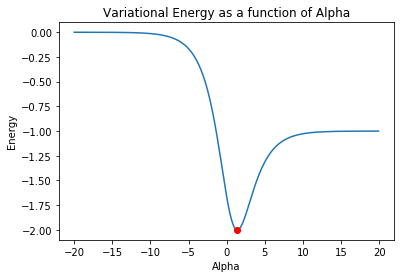

In [60]:
plt.plot(xs, ys)
plt.title("Variational Energy as a function of Alpha")
plt.ylabel("Energy")
plt.xlabel("Alpha")

optimal_alpha = xs[np.argmin(ys)]
optimal_energy = np.min(ys)

plt.plot([optimal_alpha], [optimal_energy], marker='o', markersize=6, color="red")

print("Optimal Alpha: %3.2f" % optimal_alpha)
print("Optimal Energy: %3.2f" % optimal_energy)

## Newton Method 

The newton method takes guesses of the minimum using this equation:

![Newton Method Equation](images/NM_eq.png)

Ref: https://en.wikipedia.org/wiki/Newton%27s_method

In [31]:
def get_variational_energy(alpha):
    return (-1)*(4*exp(alpha) + exp(1.5*alpha))/(2*exp(0.5*alpha) + exp(1.5*alpha))

In [44]:
def get_variational_energy_derivative(alpha):
    """
    with respect to alpha
    """
    numerator = -2*(2*exp(1.5*alpha) + exp(2*alpha) - exp(2.5*alpha))
    denominator = (2*exp(0.5*alpha) + exp(1.5*alpha)) ** 2
    
    return numerator/denominator

In [186]:
def steepest_descent(lr =0.001):
    """
    Note: only finds local minimums
    
    Algorithm will continue an additional 10 iterations
    after finding what it thinks is the optimal value
    """
    alpha = random.randint(-2000,2000)/100
    cont = True
    min_energy = 99999999999
    i = 0
    while(cont):
        try:
            energy = get_variational_energy(alpha)
            derivative = get_variational_energy_derivative(alpha)
            if energy < min_energy:
                min_energy = energy
                opt_alpha = alpha
                i = 0
            else:
                i += 1
                if i == 100:
                    cont = False
            try:
                alpha = alpha + lr*energy/derivative
            except ZeroDivisionError:
                alpha = alpha - lr*energy/(derivative+2)
        except Exception as e:
            print(e)
            set_trace()
    
            
        
    print("Optimal Alpha: %3.2f" % opt_alpha)
    print("Optimal Energy: %3.2f" % min_energy)

In [192]:
steepest_descent()

Optimal Alpha: 1.39
Optimal Energy: -2.00
